# Aircraft Business Risk Analysis Project

## **Introduction:**
My company is specifically intrested in purchasing and operating airplanes for commercial and private enterprise, but do not know about the potential risks of aircraft.

## Objective:
1.To help my company determine which aircrafts are the lowest risk to start this new business endeavor

2.To translate my findings into actionable insights that the head of the new aviation division can use to help decide which
aircraft to purchase

### Goals:
1.Decide what data to use

2.Deal with missing values

3.Aggregate the data

4.visualize the data

5.Give atleast three concrete business recommendations

**The dataset of interest is from the *National Transportation Safety Board* and it includes:**

[Aviation accident data from 1962 -2023](http://localhost:8890/edit/AviationData.csv) which contains all the accident records from 1962 - 2023,

[Selected incidents in the USA and international water](http://localhost:8890/edit/USState_Codes.csv) which contains the list of state abbreviations and full state names.


# Step 1: Loading data and deciding the data to use 

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [217]:
us_state_codes = pd.read_csv('USState_Codes.csv',encoding ='latin1') #load the dataset
us_state_codes.head() #only show the first 5 rows

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


### 1.1 Cleaning the data of interest which is Aviation accident data

In [218]:
aviation_data = pd.read_csv('AviationData.csv', encoding ='latin1') #loading the dataset
aviation_data.head() #only show the first 5 rows

C:\Users\Admin\Downloads\Anaconda\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [219]:
aviation_data.shape #checking total dataset size

(88889, 31)

checking columns and their associated heading

In [220]:
for index, col in enumerate(aviation_data.columns): 
    print(index,col)

0 Event.Id
1 Investigation.Type
2 Accident.Number
3 Event.Date
4 Location
5 Country
6 Latitude
7 Longitude
8 Airport.Code
9 Airport.Name
10 Injury.Severity
11 Aircraft.damage
12 Aircraft.Category
13 Registration.Number
14 Make
15 Model
16 Amateur.Built
17 Number.of.Engines
18 Engine.Type
19 FAR.Description
20 Schedule
21 Purpose.of.flight
22 Air.carrier
23 Total.Fatal.Injuries
24 Total.Serious.Injuries
25 Total.Minor.Injuries
26 Total.Uninjured
27 Weather.Condition
28 Broad.phase.of.flight
29 Report.Status
30 Publication.Date


# Step 2: Dealing with missing data

#### Finding missing values

To understand the extent of missing values,I calculated the total number of missing values for each column and the corresponding percentage of missing data.
This helped in identifying which columns had significance amounts of missing information which informed my decision of handling the missing data ensuring data quality.

In [221]:
missing_values = aviation_data.isna().sum() #to check the sum of missing values in each cell of the columns
missing_values =missing_values[missing_values > 0] #only keep columns if the missing count is > than 0
missing_df = missing_values.to_frame(name='Missing Values') #turn the list of missing_values into a df
missing_df['% Missing'] = (missing_df['Missing Values'] / len(aviation_data)) * 100 #create a new column called %missing and calculate the % of missing values.
missing_df

,Missing Values,% Missing
Location,52,0.058500
Country,226,0.254250
Latitude,54507,61.320298
Longitude,54516,61.330423
Airport.Code,38640,43.469946
Airport.Name,36099,40.611324
Injury.Severity,1000,1.124999
Aircraft.damage,3194,3.593246
Aircraft.Category,56602,63.677170
Registration.Number,1317,1.481623


##### checking columns with more than 20% missing values

In [222]:
columns_with_more_than_20percentmissing_values = missing_df[missing_df['% Missing'] > 20]
columns_with_more_than_20percentmissing_values

,Missing Values,% Missing
Latitude,54507,61.320298
Longitude,54516,61.330423
Airport.Code,38640,43.469946
Airport.Name,36099,40.611324
Aircraft.Category,56602,63.677170
FAR.Description,56866,63.974170
Schedule,76307,85.845268
Air.carrier,72241,81.271023
Broad.phase.of.flight,27165,30.560587


#### checking columns with less than 20% missing values

In [223]:
columns_with_less_than_20percentmissing_values =missing_df[missing_df['% Missing'] < 20 ]
columns_with_less_than_20percentmissing_values

,Missing Values,% Missing
Location,52,0.058500
Country,226,0.254250
Injury.Severity,1000,1.124999
Aircraft.damage,3194,3.593246
Registration.Number,1317,1.481623
Make,63,0.070875
Model,92,0.103500
Amateur.Built,102,0.114750
Number.of.Engines,6084,6.844491
Engine.Type,7077,7.961615


#### Handling missing values;
From the output above and carefull consideration, I decided to keep only the columns with less than 20% missing values to ensure data quality by avoiding introducing bias through excessive imputation.

In [224]:
columns_retained = missing_df[missing_df['% Missing'] < 20].index
aviation_data = aviation_data[columns_retained]
aviation_data.head()

,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date
0,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN
1,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996
2,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007
3,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000
4,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980


In [225]:
aviation_data.shape

(88889, 18)

#### Manual addition of 'Broad.phase.of.flight' column

Although initially I chose to retain only the columns with less than 20% missing values, I've decided to make an exception for the 'Broad.of.phase.of.flight' column as it provides valuable insight into when accidents occur during a flight (eg. during cruise or approach). I believe this is important for understanding risk factors and making informed business decision.

In [226]:
aviation_data_full = pd.read_csv('AviationData.csv', encoding = 'latin1')
aviation_data['Broad.phase.of.flight'] = aviation_data_full['Broad.phase.of.flight']
aviation_data.head()

C:\Users\Admin\Downloads\Anaconda\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date,Broad.phase.of.flight
0,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN,Cruise
1,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996,Unknown
2,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007,Cruise
3,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000,Cruise
4,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980,Approach


Rearranging 'Broad.phase.of.flight' column back to initially where it was for better comprehension of the dataset

In [227]:
cols = list(aviation_data.columns)
cols.remove('Broad.phase.of.flight')
report_status_index = cols.index('Report.Status')
cols.insert(report_status_index, 'Broad.phase.of.flight')
aviation_data = aviation_data[cols]
aviation_data.head()

,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


#### Replacing missing values

Replaced text - based columns' (object type) missing values with 'Unknown' and numeric columns' (integer and float types) missing values with 0

In [228]:
for col in aviation_data.columns:
    if aviation_data[col].dtype == 'object':
        aviation_data[col] = aviation_data[col].replace(np.nan, 'Unknown')
    else:
        aviation_data[col] = aviation_data[col].replace(np. nan, 0)

In [229]:
aviation_data.isna().sum().sum()

0

In [230]:
aviation_data.head()

,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown
1,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
3,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,0.0,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980


In [231]:
aviation_data.shape

(88889, 19)

# Step 3: Aggregating and Visualizing the data

## 3.1 Aggregating Data by Aircraft Make and Model to understand which aircraft are safest

In [232]:
aggregated_data = aviation_data.groupby(['Make','Model']).agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum'
}).reset_index()

aggregated_data.head()

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
0,107.5 Flying Corporation,One Design DR 107,1.0,0.0,0.0
1,1200,G103,0.0,1.0,0.0
2,177MF LLC,PITTS MODEL 12,0.0,2.0,0.0
3,1977 Colfer-chan,STEEN SKYBOLT,0.0,0.0,1.0
4,1st Ftr Gp,FOCKE-WULF 190,1.0,0.0,0.0


Creating a  'Total.injuries' column to get the number of injuries for each aircraft type.

In [233]:
aggregated_data['Total.Injuries'] = (
    aggregated_data['Total.Fatal.Injuries'] +
    aggregated_data['Total.Serious.Injuries'] +
    aggregated_data['Total.Minor.Injuries']
)

Sorting the data to identify the top 10 safest(least total injuries) aircraft (by make and model).

In [234]:
top10_safest = aggregated_data.sort_values('Total.Injuries', ascending=True).head(10)
top10_safest

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Injuries
10093,HENDRICKS GEORGE DAVID JR,RV8,0.0,0.0,0.0,0.0
5377,CONSOLIDATED AERONAUTICS INC.,LAKE LA 4 200,0.0,0.0,0.0,0.0
12062,Let,L-23,0.0,0.0,0.0,0.0
8949,Flurry,AVENTURA II,0.0,0.0,0.0,0.0
5374,CONSOLIDATED AERONAUTICS,LAKE LA4-200,0.0,0.0,0.0,0.0
5373,CONSOLIDATED AERONAUTICS INC.,LAKE LA-4,0.0,0.0,0.0,0.0
5372,CONRAD THEODORE J,THORP T-18,0.0,0.0,0.0,0.0
5371,CONNER LEROY,RV6A,0.0,0.0,0.0,0.0
8950,Fly Baby,1-A,0.0,0.0,0.0,0.0
15468,Pitts,SPECIAL 51C,0.0,0.0,0.0,0.0


Double checking overall injuries

In [235]:
aviation_data[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

Total.Fatal.Injuries      50201.0
Total.Serious.Injuries    21377.0
Total.Minor.Injuries      27478.0
dtype: float64

From the Top 10 safest aircraft output, it is clear that many aircraft models have never recorded any accidents or injuries.
However, the full dataset contains over 50,000 fatalities, indicating that most accidents are concentrated among a few aircraft types, while many others have maintained excellent safety records.


#### Visualization of the top 10 safest(0 injuries) aircraft

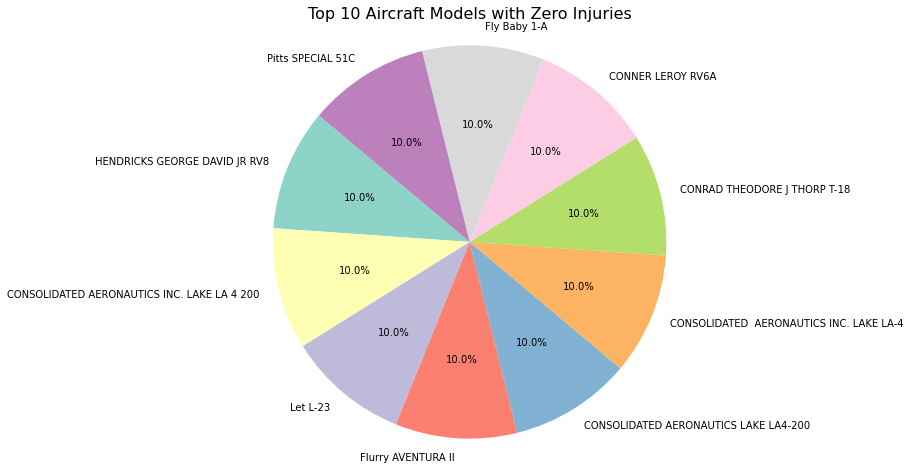

In [236]:
top10_safest['Make_Model'] = top10_safest['Make'] + " " + top10_safest['Model']
values = [1]*len(top10_safest)
plt.figure(figsize=(10,8))
plt.pie(values, labels=top10_safest['Make_Model'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Top 10 Aircraft Models with Zero Injuries', fontsize=16)
plt.axis('equal')

plt.show()

## Visualizing the Top 10 Safest Aircraft Models (Pie Chart)

The pie chart represents the Top 10 aircraft makes and models that recorded zero injuries across all reported accidents.
Since each aircraft model had no fatalities, serious injuries, or minor injuries, they are represented equally in the chart.
This visualization highlights the aircraft models that maintained perfect safety records, making them strong candidates for the company's aviation expansion plans.

## 3.2  Aggregating and Analyzing Accidents by Broad Phase of Flight

This analysis helps identify which stages of flight are most prone to accidents, allowing the company to focus safety efforts where they are most needed.

In [237]:
broad_phase_counts = aviation_data['Broad.phase.of.flight'].value_counts()
broad_phase_counts

Unknown        27713
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Other            119
Name: Broad.phase.of.flight, dtype: int64

#### visualization

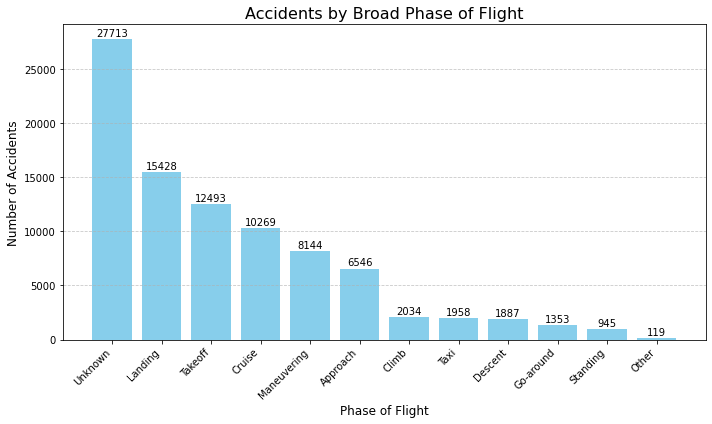

In [238]:
plt.figure(figsize=(10,6))
bars = plt.bar(broad_phase_counts.index, broad_phase_counts.values, color='skyblue')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             '%d' % int(height),
             ha='center', va='bottom', fontsize=10)

plt.title('Accidents by Broad Phase of Flight', fontsize=16)
plt.xlabel('Phase of Flight', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### The bar chart shows the total number of accidents that occurred during different phases of flight.

We can see that the highest number of accidents were recorded under the "Unknown" phase, which likely reflects incomplete or missing data in the original accident reports.
Excluding "Unknown," the most accidents occurred during the "Landing" phase, followed by "Takeoff," "Cruise," and "Maneuvering."
This trend highlights that accidents are more frequent during critical transitions of flight, particularly landing and takeoff, where aircraft operations are more complex and closer to the ground.
Other phases like "Climb," "Taxi," "Descent," "Go Around," and "Standing" had fewer recorded accidents.
Overall, this insight emphasizes the need for enhanced safety measures and pilot training specifically targeted at the landing and takeoff phases, which are the riskiest moments in flight operations.

## 3.3 Aggregating and analyzing accidents by purpose of flights

In [239]:
purpose_counts = aviation_data['Purpose.of.flight'].value_counts()
purpose_counts

Personal                     49448
Unknown                      12994
Instructional                10601
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

#### Visualization

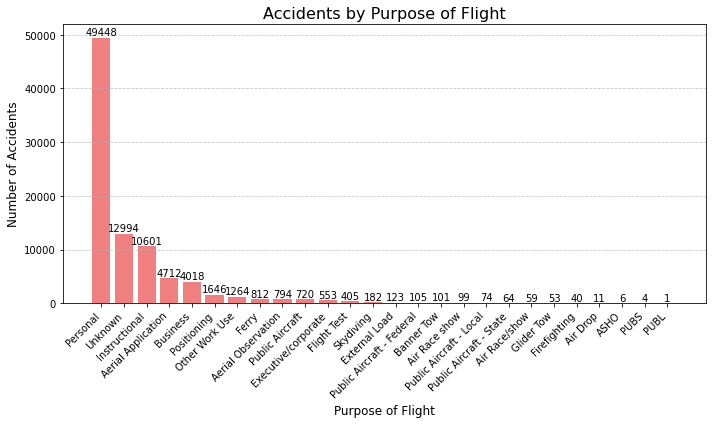

In [240]:
plt.figure(figsize=(10,6))
bars = plt.bar(purpose_counts.index, purpose_counts.values, color='lightcoral')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             '%d' % int(height),
             ha='center', va='bottom', fontsize=10)

plt.title('Accidents by Purpose of Flight', fontsize=16)
plt.xlabel('Purpose of Flight', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### The chart shows the distribution of accidents based on the purpose of flight.
The data reveals that the majority of accidents occurred during personal flights, followed by instructional, aerial application, and business operations.
This suggests that personal and training flights may involve higher risk levels, possibly due to less structured environments or less experienced pilots compared to commercial operations.
These trends emphasizes on the need to carefully assess which types of flight activities that may carry more operational risk and need to be approached with greater safety measures or strategic caution.

## 3.4 Aggregation and analysis of the severity of injury

In [241]:
injury_severity_counts = aviation_data['Injury.Severity'].value_counts()
injury_severity_counts

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(72)         1
Fatal(57)         1
Fatal(78)         1
Fatal(56)         1
Fatal(199)        1
Name: Injury.Severity, Length: 110, dtype: int64

#### The data above looks messy. let's group it into major categories

In [242]:
aviation_data['Cleaned.Injury.Severity'] = aviation_data['Injury.Severity']

aviation_data['Cleaned.Injury.Severity'] = aviation_data['Cleaned.Injury.Severity'].apply(
    lambda x: 'Fatal' if str(x).startswith('Fatal') else x
)

injury_severity_counts_cleaned = aviation_data['Cleaned.Injury.Severity'].value_counts()

injury_severity_counts_cleaned

Non-Fatal      67357
Fatal          17826
Incident        2219
Unknown         1000
Minor            218
Serious          173
Unavailable       96
Name: Cleaned.Injury.Severity, dtype: int64

#### Visualization of the major injury Severities

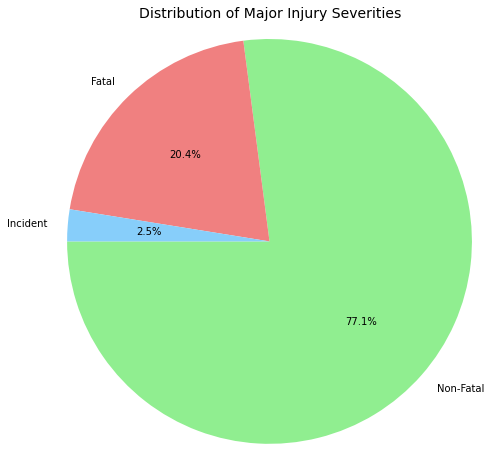

In [250]:
injury_severity_major = injury_severity_counts_cleaned[['Non-Fatal', 'Fatal', 'Incident']]

plt.figure(figsize=(8,8))
plt.pie(injury_severity_major.values, labels=injury_severity_major.index, autopct='%1.1f%%', startangle=180, colors=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Distribution of Major Injury Severities', fontsize=14)
plt.axis('equal')
plt.show()

## The chart shows the distribution of major injury severities

I focused on the major injury severity categories I.e  Non-Fatal, Fatal, and Incident and excluded categories with very few records, such as Minor, Serious, Unknown, and Unavailable.
The data shows that the majority of aviation accidents were classified as Non-Fatal, indicating that most incidents did not result in fatalities.
However, Fatal accidents still represent a significant portion of the data, emphasizing the need for strong safety protocols and emergency preparedness.

## Step 4:  Recommendations

## 1. Invest in Aircraft Models with Strong Safety Records
The analysis of aircraft make and model showed several aircraft types with zero recorded injuries across decades of operation.
I'd recommended that the company focus on purchasing aircraft models that have consistently demonstrated excellent safety performance, minimizing both operational and insurance risks.

## 2. Enhance Safety Protocols During Landing and Takeoff Phases
Accident analysis by broad phase of flight revealed that the majority of accidents occur during the landing and takeoff phases.
Special attention should be given to pilot training, equipment maintenance, and operational checklists specifically focused on these critical phases to reduce accident risks.

## 3. Exercise Caution with Personal and Training Flight Operations
The Purpose of Flight analysis showed that personal and instructional (training) flights accounted for the highest number of accidents.
While expanding into air craft business, the company should consider initially limiting or carefully structuring personal or training services, ensuring stronger oversight, maintenance, and pilot experience requirements.

## 4. Maintain Strong Emergency Response and Risk Management Systems
While most accidents resulted in Non-Fatal outcomes, Fatal accidents still represent a significant share.
It is crucial to implement robust emergency protocols, regular pilot safety drills, and proactive risk assessment strategies to protect passengers, staff, and assets in case of serious incidents.